In [10]:
import os
import zipfile

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [17]:
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(250, 250, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

#usamos el tamaño de 250x250 porque computacionalmente es mucho más eficiente

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configuración y compilación del modelo
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

last layer output shape: (None, 13, 13, 768)


In [18]:
base_dir = 'BaseFotos'
train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training arritmia pictures
train_arritmia_dir = os.path.join(train_dir, 'Arritmia')

# Directory with our training normal pictures
train_normal_dir = os.path.join(train_dir, 'Normal')

# Directory with our validation arritmia pictures
test_arritmia_dir = os.path.join(test_dir, 'Arritmia')

# Directory with our validation normal pictures
test_normal_dir = os.path.join(test_dir, 'Normal')


train_arritmia_fnames = os.listdir(train_arritmia_dir)
print(train_arritmia_fnames[:10])

train_normal_fnames = os.listdir(train_normal_dir)
train_normal_fnames.sort()
print(train_normal_fnames[:10])

['0001Lpat_109.png', '0001Lpat_111.png', '0001Lpat_207.png', '0001Lpat_214.png', '0002Apat_112.png', '0002Apat_113.png', '0002Apat_114.png', '0002Apat_118.png', '0002Apat_124.png', '0002Apat_200.png']
['0002Npat_210 - copia.png', '0002Npat_210.png', '0002Npat_212 - copia.png', '0002Npat_212.png', '0002Npat_213 - copia.png', '0002Npat_213.png', '0002Npat_215 - copia.png', '0002Npat_215.png', '0002Npat_219 - copia.png', '0002Npat_219.png']


In [28]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=1,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 11 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(250, 250),  
        batch_size=11,
        class_mode='binary')

# Flow validation images in batches of 11 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(250, 250),
        batch_size=11,
        class_mode='binary')

Found 1010 images belonging to 2 classes.
Found 137 images belonging to 2 classes.


In [42]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=15,
      validation_data=test_generator,
      validation_steps=11,
      verbose=2)

model.summary()

Epoch 1/15
20/20 - 46s - loss: 0.3186 - acc: 0.8899 - val_loss: 0.4967 - val_acc: 0.8182
Epoch 2/15
20/20 - 49s - loss: 0.2670 - acc: 0.9136 - val_loss: 0.5203 - val_acc: 0.8017
Epoch 3/15
20/20 - 46s - loss: 0.2832 - acc: 0.9128 - val_loss: 0.4575 - val_acc: 0.8264
Epoch 4/15
20/20 - 46s - loss: 0.2978 - acc: 0.8864 - val_loss: 0.5027 - val_acc: 0.8017
Epoch 5/15
20/20 - 45s - loss: 0.3076 - acc: 0.8773 - val_loss: 0.4911 - val_acc: 0.8182
Epoch 6/15
20/20 - 47s - loss: 0.2709 - acc: 0.9174 - val_loss: 0.4705 - val_acc: 0.8182
Epoch 7/15
20/20 - 50s - loss: 0.3114 - acc: 0.9128 - val_loss: 0.5293 - val_acc: 0.7934
Epoch 8/15
20/20 - 47s - loss: 0.3470 - acc: 0.8545 - val_loss: 0.4992 - val_acc: 0.8017
Epoch 9/15
20/20 - 48s - loss: 0.3134 - acc: 0.8682 - val_loss: 0.4677 - val_acc: 0.8182
Epoch 10/15
20/20 - 49s - loss: 0.2939 - acc: 0.8909 - val_loss: 0.4984 - val_acc: 0.8099
Epoch 11/15
20/20 - 49s - loss: 0.2754 - acc: 0.9045 - val_loss: 0.4641 - val_acc: 0.8182
Epoch 12/15
20/20 -

Accuracy Score : [0.8899082541465759, 0.9136363863945007, 0.9128440618515015, 0.8863636255264282, 0.8772727251052856, 0.9174311757087708, 0.9128440618515015, 0.8545454740524292, 0.8681818246841431, 0.8909090757369995, 0.9045454263687134, 0.8818181753158569, 0.9227272868156433, 0.8500000238418579, 0.8863636255264282]
AReport : 
[0.8181818127632141, 0.8016529083251953, 0.8264462947845459, 0.8016529083251953, 0.8181818127632141, 0.8181818127632141, 0.7933884263038635, 0.8016529083251953, 0.8181818127632141, 0.8099173307418823, 0.8181818127632141, 0.7933884263038635, 0.8181818127632141, 0.8264462947845459, 0.8181818127632141]
Loss Score : [0.31863921880722046, 0.2669847011566162, 0.28320473432540894, 0.2977999746799469, 0.30756598711013794, 0.27090054750442505, 0.3113507032394409, 0.347035676240921, 0.31342244148254395, 0.2939319908618927, 0.2754324972629547, 0.2895336449146271, 0.2564931809902191, 0.3279874622821808, 0.29423338174819946]
LReport : 
[0.4967269003391266, 0.520281970500946, 

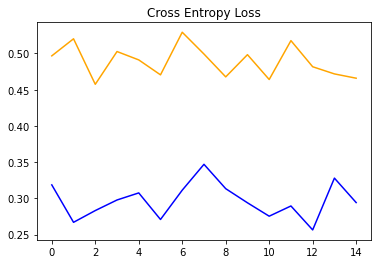

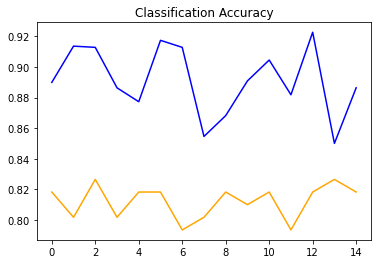

<Figure size 432x288 with 0 Axes>

In [43]:
# Retrieve a list of accuracy and loss results on training and validation data
acc = history.history['acc']
test_acc = history.history['val_acc']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(len(acc))

plt.subplot(111)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.figure()
plt.subplot(111)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='test')

plt.figure()

print ('Accuracy Score :',history.history['acc'] )
print ('AReport : ')
print (history.history['val_acc']) 
print ('Loss Score :',history.history['loss'] )
print ('LReport : ')
print (history.history['val_loss']) 

In [44]:
unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

Epoch 1/15
20/20 - 55s - loss: 0.3020 - acc: 0.8818 - val_loss: 0.4525 - val_acc: 0.8347
Epoch 2/15
20/20 - 50s - loss: 0.2824 - acc: 0.9182 - val_loss: 0.4803 - val_acc: 0.8099
Epoch 3/15
20/20 - 47s - loss: 0.2858 - acc: 0.9174 - val_loss: 0.5116 - val_acc: 0.8017
Epoch 4/15
20/20 - 45s - loss: 0.2737 - acc: 0.8818 - val_loss: 0.4618 - val_acc: 0.8347
Epoch 5/15
20/20 - 45s - loss: 0.2798 - acc: 0.9136 - val_loss: 0.4659 - val_acc: 0.8264
Epoch 6/15
20/20 - 45s - loss: 0.2718 - acc: 0.9091 - val_loss: 0.4694 - val_acc: 0.8182
Epoch 7/15
20/20 - 45s - loss: 0.3019 - acc: 0.8955 - val_loss: 0.4559 - val_acc: 0.8182
Epoch 8/15
20/20 - 42s - loss: 0.2730 - acc: 0.9000 - val_loss: 0.4839 - val_acc: 0.8099
Epoch 9/15
20/20 - 41s - loss: 0.2782 - acc: 0.8773 - val_loss: 0.4741 - val_acc: 0.8182
Epoch 10/15
20/20 - 42s - loss: 0.2398 - acc: 0.9358 - val_loss: 0.4627 - val_acc: 0.8182
Epoch 11/15
20/20 - 42s - loss: 0.3053 - acc: 0.8727 - val_loss: 0.4652 - val_acc: 0.8347
Epoch 12/15
20/20 -

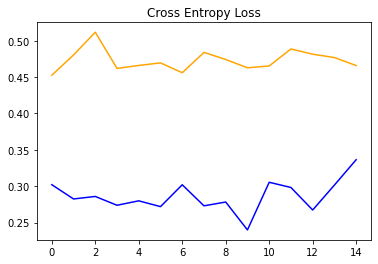

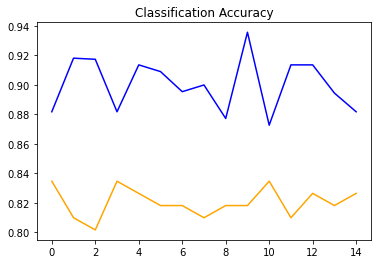

<Figure size 432x288 with 0 Axes>

In [45]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=15,
      validation_data=test_generator,
      validation_steps=11,
      verbose=2)

model.summary()

# Retrieve a list of accuracy and loss results on training and validation data
acc = history.history['acc']
test_acc = history.history['val_acc']


loss = history.history['loss']
test_loss = history.history['val_loss']


epochs = range(len(acc))

plt.subplot(111)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.figure()
plt.subplot(111)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='test')

plt.figure()

print ('Accuracy Score :',history.history['acc'] )
print ('AReport : ')
print (history.history['val_acc']) 
print ('Loss Score :',history.history['loss'] )
print ('LReport : ')
print (history.history['val_loss']) 